# ISM Lecture 3 continued in week 04 Part 1 Solutions

This content is authored by Maria Boutchkova for use in the University of Edinbugh Business School Investment and Securities Markets course in Autumn 2020. 

Make sure to have watched the videos preceeding this Notebook and have covered the slides. Detailed explanations in the assigned textbook chapters.

This lesson covers:

* Value-weighted Portfolio risk and return of N assets

The first computational cell below (with In \[ \] in front) contains the solution. Go over the command lines, make sure they make sense to you, click inside the cell, it should become surrounded by a green rectangle, press Esc - the rectangle will become blue, now press Shift+Enter - this will execute the cell and produce the results beneath it.

To remove all output in the notebook and start again, go to the Kernel tab above, select Restart and Clear Output.

In this notebook we use the functionality of the pandas library. If you want to explore its full documetation, see [here](https://pandas.pydata.org/pandas-docs/stable/index.html).


## Input data

Now we are going to import two csv files with data on the S&P500 index: one of monthly prices (same as last week) and another one of market capitalizations (when a company has only one class of common stock and no preferred stock, mkt cap = stock price * number of shares outstanding).

We shall form a value-weighted portfolio and compute its risk and return.

In this example we have monthly adjusted closing prices of the stocks in the S&P500 index from December 2017 until end of September 2020 (34 monthly observations per stock). The original data is arranged with stocks down the rows and dates along the columns.

In [1]:
# input a list of the prices on the portfolio components and save it as a panda series
import pandas as pd
prices_orig = pd.read_csv("SnP500_monthly.csv", index_col=0)
# transpose the data so that the stocks are in the columns and the dates are along the rows
prices = prices_orig.transpose()
prices.head(5)

capiqid,IQ289194,IQ997111,IQ247483,IQ141885706,IQ247589,IQ972190,IQ4222231,IQ24321,IQ24333,IQ168864,...,IQ3449701,IQ527542,IQ103599,IQ36762,IQ118218449,IQ365997,IQ393488,IQ264048,IQ315476,IQ215548781
31-Dec-17,215.700961,58.419420,54.453820,84.616997,187.41,146.729186,62.084968,175.24,98.753580,10.28,...,158.775565,44.432228,26.008437,64.401917,65.874500,77.746174,103.80,118.012882,47.123920,70.842878
31-Jan-18,229.566600,63.834636,59.594123,98.891881,235.00,154.022994,72.684123,199.76,115.891075,13.74,...,155.950209,42.151048,30.451731,69.751231,69.796061,80.585086,123.16,124.320855,50.090604,75.578987
28-Feb-18,217.101928,61.358869,57.839663,102.073129,268.18,154.320113,71.703627,209.13,113.176813,12.11,...,158.229493,39.971458,27.052343,68.418033,72.245440,77.886216,138.14,113.690210,51.158984,79.647034
31-Mar-18,202.361748,60.785332,57.446587,83.408630,290.99,147.122150,66.485220,216.08,117.497597,10.05,...,172.267046,42.373352,25.901602,69.368684,74.512191,81.475222,139.19,106.875422,49.074281,82.257282
30-Apr-18,179.195974,58.813105,55.998733,85.964280,300.95,146.196513,65.391259,221.60,113.433994,10.88,...,175.885070,43.640453,28.304565,61.686659,70.618028,83.360646,134.83,112.883734,50.954237,82.348424


## Solved Problem 1: Forming a value-weighted portfolio and computing its average return and st. dev.

Let us form a value-weighted portfolio of the US stocks and compute its expected return, variance and st. dev.

The weights will be equal to the mkt cap of each stock over the total of the mkt cap of all stocks.

In [2]:
mkt_cap = pd.read_csv("SnP500_mkt_cap.csv", index_col=0)
weights_v = mkt_cap / mkt_cap.sum()
# name the column containing the weights to be called weights
weights_v.columns = ['weights']
weights_v.head(5)

,weights
capiq,
IQ289194,0.003105
IQ997111,0.000287
IQ247483,0.006484
IQ141885706,0.005202
IQ247589,0.000420


In [3]:
returns = prices / prices.shift(1) - 1
# drop NaN-s
returns = returns[1:]
returns.head(5)

capiqid,IQ289194,IQ997111,IQ247483,IQ141885706,IQ247589,IQ972190,IQ4222231,IQ24321,IQ24333,IQ168864,...,IQ3449701,IQ527542,IQ103599,IQ36762,IQ118218449,IQ365997,IQ393488,IQ264048,IQ315476,IQ215548781
31-Jan-18,0.064282,0.092695,0.094397,0.168700,0.253935,0.049709,0.170720,0.139922,0.173538,0.336576,...,-0.017795,-0.051341,0.170840,0.083061,0.059531,0.036515,0.186513,0.053452,0.062955,0.066854
28-Feb-18,-0.054297,-0.038784,-0.029440,0.032169,0.141191,0.001929,-0.013490,0.046906,-0.023421,-0.118632,...,0.014615,-0.051709,-0.111632,-0.019114,0.035093,-0.033491,0.121630,-0.085510,0.021329,0.053825
31-Mar-18,-0.067895,-0.009347,-0.006796,-0.182854,0.085055,-0.046643,-0.072777,0.033233,0.038177,-0.170107,...,0.088716,0.060090,-0.042538,0.013895,0.031376,0.046080,0.007601,-0.059942,-0.040749,0.032773
30-Apr-18,-0.114477,-0.032446,-0.025203,0.030640,0.034228,-0.006292,-0.016454,0.025546,-0.034585,0.082587,...,0.021002,0.029903,0.092773,-0.110742,-0.052262,0.023141,-0.031324,0.056218,0.038308,0.001108
31-May-18,0.021549,0.028036,0.058490,0.024754,0.266456,0.030026,0.068726,0.124910,0.123810,0.261949,...,0.056894,-0.028181,-0.135771,0.065787,-0.031473,-0.062207,0.138545,-0.031779,0.005268,0.002635


In [4]:
means = returns.mean()
means.head(5)

capiqid
IQ289194      -0.006654
IQ997111       0.000354
IQ247483       0.022796
IQ141885706    0.005003
IQ247589       0.022617
dtype: float64

In [5]:
vars = returns.var()
vars.head(5)

capiqid
IQ289194       0.004709
IQ997111       0.006839
IQ247483       0.003376
IQ141885706    0.008182
IQ247589       0.021922
dtype: float64

In [6]:
port_ave_ret = means.mul(weights_v.weights).sum()
port_ave_ret

0.016386336132511736

In [7]:
# same thing using the numpy library instead
import numpy as np
port_exp_ret = np.sum(returns.mean()*weights_v.weights)
port_exp_ret

0.016386336132511736

In [8]:
cov = returns.cov()
cov.head(5)

capiqid,IQ289194,IQ997111,IQ247483,IQ141885706,IQ247589,IQ972190,IQ4222231,IQ24321,IQ24333,IQ168864,...,IQ3449701,IQ527542,IQ103599,IQ36762,IQ118218449,IQ365997,IQ393488,IQ264048,IQ315476,IQ215548781
capiqid,,,,,,,,,,,,,,,,,,,,,
IQ289194,0.004709,0.004151,0.002764,0.002927,0.002758,0.002662,0.001270,0.002775,0.004850,0.005785,...,0.006660,0.000266,0.004070,0.004336,0.003492,0.002025,0.005013,0.003778,0.004122,0.001677
IQ997111,0.004151,0.006839,0.002717,0.002250,0.003786,0.002824,0.002593,0.002999,0.004508,0.005546,...,0.007926,0.000859,0.005238,0.004931,0.003819,0.002203,0.006518,0.003788,0.004990,0.002554
IQ247483,0.002764,0.002717,0.003376,0.001173,0.004438,0.002146,0.001591,0.001972,0.002774,0.006118,...,0.004643,0.000938,0.002004,0.002572,0.002993,0.002680,0.004140,0.003351,0.002027,0.001507
IQ141885706,0.002927,0.002250,0.001173,0.008182,0.003089,0.002001,0.001157,0.002323,0.005763,0.005684,...,0.003779,-0.001000,0.001113,0.000270,0.001925,0.001025,0.004203,0.002507,0.003903,0.000847
IQ247589,0.002758,0.003786,0.004438,0.003089,0.021922,0.003766,0.005507,0.005717,0.007173,0.012980,...,0.009053,-0.000145,0.001962,0.003356,0.002898,0.003623,0.009995,0.003861,0.005780,0.001456


In [9]:
port_var = np.dot(weights_v.weights, np.dot(cov, weights_v.weights))
port_var

0.0028168614006782596

In [10]:
port_std = port_var**(1/2)
port_std

0.05307411233999359

## Practice Problem 1: Forming a value-weighted portfolio and computing its average return and st. dev.

Let us form the value-weighted portfolio of the UK stocks and compute its expected return, variance and st. dev.

The weights will be equal to the mkt cap of each stock over the total of the mkt cap of all stocks. The weights vector of the UK stocks is formed for you: weights_v_uk.

Your task is to 1) compute the average return of the value-weighted UK portfolio; 2) compute the variance of the value-weighted UK portfolio and 3) compute the standard deviation of the value-weighted UK portfolio. Name everything _uk.

In [11]:
prices_orig_uk = pd.read_csv("FTSE100_250_monthly.csv", index_col=0)
# transpose the data so that the stocks are in the columns and the dates are along the rows
prices_uk = prices_orig_uk.transpose()
prices_uk.head(5)

capiq,IQ18511,IQ32482767,IQ877345,IQ23649699,IQ877445,IQ728553,IQ883002,IQ586061012,IQ47232878,IQ874060,...,IQ4217734,IQ745293,IQ94862,IQ874983,IQ264416006,IQ875491,IQ881480,IQ881497,IQ312546,IQ7658290
31-Dec-17,8.288486,1.927373,17.683328,2.498701,12.118879,16.762278,7.374503,NaN,NaN,7.092079,...,21.931477,32.806241,2.878352,2.014204,36.80,1.895044,8.967484,24.771795,11.991364,32.092749
31-Jan-18,8.450898,1.862510,18.614029,2.499588,12.301668,15.472872,7.444648,NaN,NaN,7.144331,...,20.284387,31.830255,2.771084,2.019804,34.63,1.913142,9.345268,24.507641,11.428012,31.250666
28-Feb-18,8.525300,1.823592,17.590258,2.533294,11.945699,15.431008,6.898252,NaN,NaN,7.011325,...,19.240756,31.846658,2.936456,1.978736,36.25,1.945027,8.564238,24.360888,12.465296,29.285803
31-Mar-18,7.793989,1.969181,15.292734,2.469690,12.095020,15.439381,6.776420,NaN,NaN,6.670586,...,18.481752,30.345773,2.952546,1.904997,32.54,1.839891,8.957010,23.529292,10.126935,30.102447
30-Apr-18,8.543446,2.023113,16.700636,2.506305,13.084273,16.686923,6.924066,NaN,NaN,6.947334,...,18.510215,35.110879,2.698818,1.987660,31.94,2.094976,10.013432,24.116301,11.155277,33.027764


In [12]:
mkt_cap = pd.read_csv("FTSE100_250_mkt_cap.csv", index_col=0)
weights_v_uk = mkt_cap / mkt_cap.sum()
# name the column containing the weights to be called weights
weights_v_uk.columns = ['weights']
weights_v_uk.head(5)

,weights
capiq,
IQ18511,0.004252
IQ32482767,0.001144
IQ877345,0.000232
IQ23649699,0.000412
IQ877445,0.000329


In [13]:
returns_uk = prices_uk / prices_uk.shift(1) - 1
# drop NaN-s
returns_uk = returns_uk[1:]
returns_uk.head(5)

capiq,IQ18511,IQ32482767,IQ877345,IQ23649699,IQ877445,IQ728553,IQ883002,IQ586061012,IQ47232878,IQ874060,...,IQ4217734,IQ745293,IQ94862,IQ874983,IQ264416006,IQ875491,IQ881480,IQ881497,IQ312546,IQ7658290
31-Jan-18,0.019595,-0.033654,0.052632,0.000355,0.015083,-0.076923,0.009512,NaN,NaN,0.007368,...,-0.075102,-0.029750,-0.037267,0.002780,-0.058967,0.009550,0.042128,-0.010663,-0.046980,-0.026239
28-Feb-18,0.008804,-0.020895,-0.055000,0.013485,-0.028937,-0.002706,-0.073394,NaN,NaN,-0.018617,...,-0.051450,0.000515,0.059678,-0.020333,0.046780,0.016666,-0.083575,-0.005988,0.090767,-0.062874
31-Mar-18,-0.085781,0.079836,-0.130613,-0.025107,0.012500,0.000543,-0.017661,NaN,NaN,-0.048598,...,-0.039448,-0.047128,0.005479,-0.037266,-0.102345,-0.054054,0.045862,-0.034137,-0.187590,0.027885
30-Apr-18,0.096158,0.027388,0.092063,0.014826,0.081790,0.080803,0.021788,NaN,NaN,0.041488,...,0.001540,0.157027,-0.085935,0.043393,-0.018439,0.138641,0.117944,0.024948,0.101545,0.097179
31-May-18,0.012107,0.033492,0.017442,0.094229,0.015692,-0.005191,-0.040688,NaN,NaN,0.017857,...,-0.006663,0.001214,0.092896,0.029506,0.065122,0.045760,0.025248,0.060852,-0.012024,-0.022857


In [14]:
means_uk = returns_uk.mean()
means_uk.head(5)

capiq
IQ18511       0.007996
IQ32482767    0.013642
IQ877345      0.008053
IQ23649699    0.006066
IQ877445     -0.007530
dtype: float64

In [15]:
vars_uk = returns_uk.var()
vars_uk.head(5)

capiq
IQ18511       0.004731
IQ32482767    0.002479
IQ877345      0.012767
IQ23649699    0.012370
IQ877445      0.006507
dtype: float64

In [16]:
cov_uk = returns_uk.cov()
cov_uk.head(5)

capiq,IQ18511,IQ32482767,IQ877345,IQ23649699,IQ877445,IQ728553,IQ883002,IQ586061012,IQ47232878,IQ874060,...,IQ4217734,IQ745293,IQ94862,IQ874983,IQ264416006,IQ875491,IQ881480,IQ881497,IQ312546,IQ7658290
capiq,,,,,,,,,,,,,,,,,,,,,
IQ18511,0.004731,0.001513,0.004398,0.001329,0.003337,0.000826,0.003131,0.004721,0.003899,0.002277,...,0.003608,0.001889,0.007808,0.002533,0.003633,0.001189,0.003557,0.000774,0.004058,0.002900
IQ32482767,0.001513,0.002479,0.003350,-0.000411,0.002335,0.000304,0.001735,0.008007,0.002254,0.001361,...,0.002376,0.001329,0.003487,0.001463,0.003379,-0.000057,0.001926,0.000732,0.002092,0.002208
IQ877345,0.004398,0.003350,0.012767,-0.001969,0.005585,0.000606,0.005995,0.010273,0.005416,0.003546,...,0.005620,0.004641,0.000616,0.003980,0.006932,0.002255,0.004848,0.002599,0.006473,0.003995
IQ23649699,0.001329,-0.000411,-0.001969,0.012370,0.000558,0.001270,-0.002257,0.007127,-0.000520,0.001174,...,-0.000544,-0.002041,0.013974,0.001217,0.000981,0.000957,-0.000646,0.001097,0.002576,0.001832
IQ877445,0.003337,0.002335,0.005585,0.000558,0.006507,0.000687,0.004866,0.012900,0.005240,0.003152,...,0.007911,0.004470,0.010609,0.003550,0.006291,0.001452,0.005497,0.002041,0.005842,0.004489


In [17]:
port_ave_ret_uk = means_uk.mul(weights_v_uk.weights).sum()
port_ave_ret_uk

0.004490585248671755

In [18]:
port_var_uk = np.dot(weights_v_uk.weights, np.dot(cov_uk, weights_v_uk.weights))
port_var_uk

0.0017260987553760255

In [19]:
port_std_uk = port_var_uk**(1/2)
port_std_uk

0.04154634466924889

## Solved Problem 2: Plotting different portfolios on the expected return - st. dev. coordinate system.
Recall that we use the average reurn as an estimate of the expected return.

Let us graph the value-weighted US portfolio we computed just now and the equally-weighted one from last week. First we recompute quickly the equally-weighted one here and name the new outputs _eq.

In [20]:
# declate a list of 500 elements each equal to 1/500
lst = [1/500]*500
# make it into a dataframe
weights_eq = pd.DataFrame(lst)
# name the column containing the weights to be called weights
weights_eq.columns = ['weights']
# do the transposing gymnastics
aux = weights_eq.T
# take the stock id-s from the returns dataframe and put them in a list called lst
lst = list(returns.columns.values)
# assign the id-s in lst to be the header of the weights
aux.columns = lst
weights_eq = aux.T
# calculate the equally-weighted portfolio average return, var and st. dev.
port_ave_ret_eq = means.mul(weights_eq.weights).sum()
port_var_eq = np.dot(weights_eq.weights, np.dot(cov, weights_eq.weights))
port_std_eq = port_var_eq**(1/2)
port_std_eq

0.06036665567398246

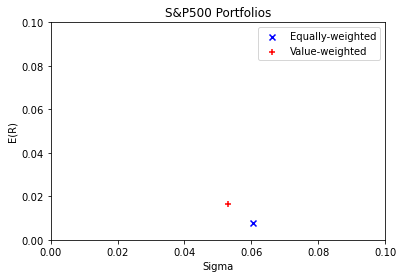

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(port_std_eq, port_ave_ret_eq, c='b', marker='x', label='Equally-weighted')
plt.scatter(port_std, port_ave_ret, c='r', marker='+', label='Value-weighted')
plt.legend(loc='upper right')

# add axes labels
plt.xlabel('Sigma')
plt.ylabel('E(R)')

# add title
plt.title('S&P500 Portfolios');

# control axes ranges
plt.xlim(0, .1)
plt.ylim(0, .1)


plt.show()

## Practice Problem 2: Plotting different portfolios on the expected return - st. dev. coordinate system.

Graph the value-weighted UK portfolio you computed just now and the equally-weighted one from last week. First we recompute quickly the equally-weighted one here and name the new outputs _eq.

In [22]:
# declate a list of 500 elements each equal to 1/500
lst = [1/350]*350
# make it into a dataframe
weights_eq_uk = pd.DataFrame(lst)
# name the column containing the weights to be called weights
weights_eq_uk.columns = ['weights']
# do the transposing gymnastics
aux = weights_eq_uk.T
lst = list(returns_uk.columns.values)
aux.columns = lst
weights_eq_uk = aux.T
# calculate the equally-weighted portfolio average return, var and st. dev.
port_ave_ret_uk_eq = means_uk.mul(weights_eq_uk.weights).sum()
port_var_uk_eq = np.dot(weights_eq_uk.weights, np.dot(cov_uk, weights_eq_uk.weights))
port_std_uk_eq = port_var_uk_eq**(1/2)
port_std_uk_eq

0.0533425765206709

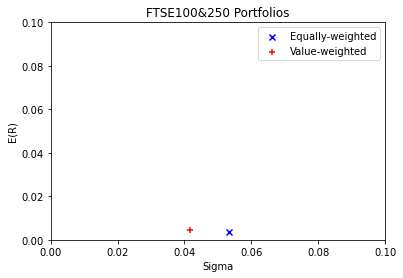

In [23]:
plt.scatter(port_std_uk_eq, port_ave_ret_uk_eq, c='b', marker='x', label='Equally-weighted')
plt.scatter(port_std_uk, port_ave_ret_uk, c='r', marker='+', label='Value-weighted')
plt.legend(loc='upper right')

# add axes labels
plt.xlabel('Sigma')
plt.ylabel('E(R)')

# add title
plt.title('FTSE100&250 Portfolios');

# control axes ranges
plt.xlim(0, .1)
plt.ylim(0, .1)


plt.show()

## Extra

This is how we can graph both the US and UK index constituents.

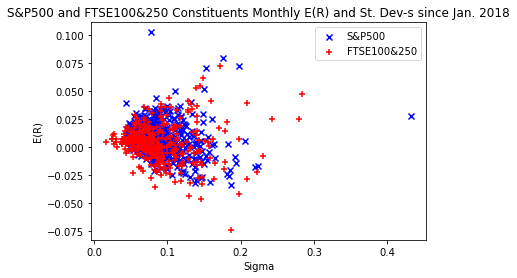

In [24]:
# compute the st dev-s of each group and save
std = returns.std()
std_uk = returns_uk.std()

### import matplotlib's plotting functions
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(std, means, c='b', marker='x', label='S&P500')
plt.scatter(std_uk, means_uk, c='r', marker='+', label='FTSE100&250')
plt.legend(loc='upper right')

# add axes labels
plt.xlabel('Sigma')
plt.ylabel('E(R)')

# add title
plt.title('S&P500 and FTSE100&250 Constituents Monthly E(R) and St. Dev-s since Jan. 2018');

# control axes ranges
#plt.xlim(0, .3)
#plt.ylim(-.05, .1)

plt.show()